In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

**<font size='5' color='red'>ch04. RNN(Recurrent Neural Network 순환신경망)</font>**

# 1. 전처리

In [2]:
text = '''경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다'''

In [3]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])  # text -> 숫자 : 빈도수에 따라 앞으로 위치시킴
encoded = t.texts_to_sequences([text])[0]  # texts_to_sequences() : list가 들어가야 함. [0]:2차원->1차원
print(encoded)
print(t.word_index)  # 딕셔너리

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [4]:
# 문자열 리스트를 인덱스 시퀀스로 반환
print(t.texts_to_sequences(['경마장에 말이 있다', '말이 곱다']))
print(t.texts_to_sequences(['경마장에 말이 있다'])[0])  # 예측시

[[2, 1, 5], [1, 11]]
[2, 1, 5]


In [5]:
print(t.texts_to_matrix(['말이 뛰고']))
print(t.texts_to_sequences(['말이 뛰고']))

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[1, 4]]


In [6]:
print(t.word_index)
for word, value in t.word_index.items():
    if value == 2:
        print('2 : ', word)
        break

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}
2 :  경마장에


In [7]:
# text를 학습시키기 위해 ['경마장에 있는', '경마장에 있는 말이', '경마장에 있는 말이 뛰고', ...] 단위로 나눠 sequences에 append
# 독립변수(x) : 유동적, 종속변수(y) : 고정
sequences = []
for line in text.split('\n'):
    print('원본 문장 : ', line)
    encoded = t.texts_to_sequences([line])[0]  # 1차원
    print('encoded된 문장 : ', encoded)
    print()
    for i in range(0, len(encoded)-1):        # 시작 index
        for j in range(i+2, len(encoded)+1):  # 끝 index
            sequences.append(encoded[i : j])  # i번째부터 j번째 앞까지
# sequences
print('sequences와 해석 : ')
for sequence in sequences:
    print('[', end='')
    for word_seq in sequence:
        for word, value in t.word_index.items():
            if word_seq == value:
                print('{} : {}'.format(word_seq, word), end=' ')
                break
    print(']')

원본 문장 :  경마장에 있는 말이 뛰고 있다
encoded된 문장 :  [2, 3, 1, 4, 5]

원본 문장 :  그의 말이 법이다
encoded된 문장 :  [6, 1, 7]

원본 문장 :  가는 말이 고와야 오는 말이 곱다
encoded된 문장 :  [8, 1, 9, 10, 1, 11]

sequences와 해석 : 
[2 : 경마장에 3 : 있는 ]
[2 : 경마장에 3 : 있는 1 : 말이 ]
[2 : 경마장에 3 : 있는 1 : 말이 4 : 뛰고 ]
[2 : 경마장에 3 : 있는 1 : 말이 4 : 뛰고 5 : 있다 ]
[3 : 있는 1 : 말이 ]
[3 : 있는 1 : 말이 4 : 뛰고 ]
[3 : 있는 1 : 말이 4 : 뛰고 5 : 있다 ]
[1 : 말이 4 : 뛰고 ]
[1 : 말이 4 : 뛰고 5 : 있다 ]
[4 : 뛰고 5 : 있다 ]
[6 : 그의 1 : 말이 ]
[6 : 그의 1 : 말이 7 : 법이다 ]
[1 : 말이 7 : 법이다 ]
[8 : 가는 1 : 말이 ]
[8 : 가는 1 : 말이 9 : 고와야 ]
[8 : 가는 1 : 말이 9 : 고와야 10 : 오는 ]
[8 : 가는 1 : 말이 9 : 고와야 10 : 오는 1 : 말이 ]
[8 : 가는 1 : 말이 9 : 고와야 10 : 오는 1 : 말이 11 : 곱다 ]
[1 : 말이 9 : 고와야 ]
[1 : 말이 9 : 고와야 10 : 오는 ]
[1 : 말이 9 : 고와야 10 : 오는 1 : 말이 ]
[1 : 말이 9 : 고와야 10 : 오는 1 : 말이 11 : 곱다 ]
[9 : 고와야 10 : 오는 ]
[9 : 고와야 10 : 오는 1 : 말이 ]
[9 : 고와야 10 : 오는 1 : 말이 11 : 곱다 ]
[10 : 오는 1 : 말이 ]
[10 : 오는 1 : 말이 11 : 곱다 ]
[1 : 말이 11 : 곱다 ]


In [8]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [3, 1],
 [3, 1, 4],
 [3, 1, 4, 5],
 [1, 4],
 [1, 4, 5],
 [4, 5],
 [6, 1],
 [6, 1, 7],
 [1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11],
 [1, 9],
 [1, 9, 10],
 [1, 9, 10, 1],
 [1, 9, 10, 1, 11],
 [9, 10],
 [9, 10, 1],
 [9, 10, 1, 11],
 [10, 1],
 [10, 1, 11],
 [1, 11]]

In [9]:
# sequence별 len
print([len(sequence) for sequence in sequences])

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [10]:
# 독립변수가 가장 많은 것(my_len)을 기준으로 maxlen 조정
my_len = max([len(sequence) for sequence in sequences])
my_len

6

In [11]:
# sequences를 훈련 가능하도록 6개 열로 조정 : padding 작업
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(sequences=sequences, 
                                maxlen=my_len,     # 최대 열 수
                                padding='pre',     # pre:앞, post:뒤. 최대 열수보다 작은 경우 0을 채울 위치. 종속변수의 열이 0이 될 수 없으므로 'pre'처리
                                # truncating='pre',  # pre:앞, post:뒤. 최대 열수보다 많은 경우 데이터를 자를 위치.
                                # value=0.0  # 0:기본값(채울값). 1로 변경 시 빈 공간이 1이 되지만 1:'말이'이므로 제외.
                                )
type(padded_sequence), padded_sequence.shape, padded_sequence

(numpy.ndarray,
 (28, 6),
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  0,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  1,  9],
        [ 0,  0,  0,  1,  9, 10],
        [ 0,  0,  1,  9, 10,  1],
        [ 0,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  9, 10],
        [ 0,  0,  0,  9, 10,  1],
        [ 0,  0,  9, 10,  1, 11],
        [ 0,  0,  0,  0, 10,  1],
        [ 0,  0,  0, 10,  1, 11],
        [ 0,  0,  0,  0,  1, 11]]))

In [12]:
# 독립변수(X)와 타켓변수(종속변수y)로 분리
X = padded_sequence[:, :-1]  # 입력
y = padded_sequence[:, -1]   # 출력. 원핫인코딩 필요

In [13]:
# 단어 갯수
vocab_size = len(t.word_index)
vocab_size

11

In [14]:
# 종속변수의 원핫인코딩(pd.dummies:없는 분류가 존재하므로 사용x, to_categorical)
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, vocab_size+1)  # vocab_size+1:원핫인코딩 카테고리수
Y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [15]:
X.shape, Y.shape

((28, 5), (28, 12))

# 2. 모델 생성(RNN)
 - 순서가 의미 있는 데이터를 학습할 경우 ex. 자연어처리, 연주, 주식, 날씨, ...

In [16]:
from tensorflow.keras.models import Sequential  # 순차적 레이어 모델 생성
from tensorflow.keras.layers import Embedding, SimpleRNN, RNN  # 긴 희소행렬 변환
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

# 희소행렬(12열) -> 10열 행렬 (28개(X.shape[0]=독립변수 행수)
model.add(Embedding(input_dim=vocab_size+1,   # 12개 입력. Param:12*10=120
                    output_dim=vocab_size-1,  # 10개 출력하기 위한 embedding
                    input_length=X.shape[1])) # 데이터 수
model.add(SimpleRNN(units=32))  
model.add(Dense(units=12, activation='softmax'))  # 다중분류. 32*12+12=396
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 10)             120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
None


# 3. 학습과정 설정 및 학습하기

In [18]:
model.compile(loss='categorical_crossentropy',  # 다중분류에서의 손실함수
              optimizer='adam', 
              metrics=['accuracy'])  # 평가지표 : accuracy, recall, precision
hist = model.fit(x=X, y=Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 2.5007 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/300
1/1 - 0s - loss: 2.4908 - accuracy: 0.0000e+00 - 0s/epoch - 0s/step
Epoch 3/300
1/1 - 0s - loss: 2.4809 - accuracy: 0.0000e+00 - 0s/epoch - 0s/step
Epoch 4/300
1/1 - 0s - loss: 2.4708 - accuracy: 0.0000e+00 - 0s/epoch - 0s/step
Epoch 5/300
1/1 - 0s - loss: 2.4605 - accuracy: 0.0357 - 0s/epoch - 0s/step
Epoch 6/300
1/1 - 0s - loss: 2.4499 - accuracy: 0.0357 - 0s/epoch - 0s/step
Epoch 7/300
1/1 - 0s - loss: 2.4389 - accuracy: 0.0357 - 0s/epoch - 0s/step
Epoch 8/300
1/1 - 0s - loss: 2.4275 - accuracy: 0.0357 - 16ms/epoch - 16ms/step
Epoch 9/300
1/1 - 0s - loss: 2.4156 - accuracy: 0.0357 - 0s/epoch - 0s/step
Epoch 10/300
1/1 - 0s - loss: 2.4032 - accuracy: 0.0714 - 0s/epoch - 0s/step
Epoch 11/300
1/1 - 0s - loss: 2.3902 - accuracy: 0.0714 - 16ms/epoch - 16ms/step
Epoch 12/300
1/1 - 0s - loss: 2.3766 - accuracy: 0.0714 - 0s/epoch - 0s/step
Epoch 13/300
1/1 - 0s - loss: 2.3624 - accuracy: 0.0714 - 0s/

Epoch 106/300
1/1 - 0s - loss: 1.1713 - accuracy: 0.6786 - 8ms/epoch - 8ms/step
Epoch 107/300
1/1 - 0s - loss: 1.1573 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 108/300
1/1 - 0s - loss: 1.1435 - accuracy: 0.6786 - 9ms/epoch - 9ms/step
Epoch 109/300
1/1 - 0s - loss: 1.1299 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 110/300
1/1 - 0s - loss: 1.1165 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 111/300
1/1 - 0s - loss: 1.1034 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 112/300
1/1 - 0s - loss: 1.0905 - accuracy: 0.6786 - 4ms/epoch - 4ms/step
Epoch 113/300
1/1 - 0s - loss: 1.0778 - accuracy: 0.6786 - 3ms/epoch - 3ms/step
Epoch 114/300
1/1 - 0s - loss: 1.0654 - accuracy: 0.7143 - 3ms/epoch - 3ms/step
Epoch 115/300
1/1 - 0s - loss: 1.0531 - accuracy: 0.7143 - 0s/epoch - 0s/step
Epoch 116/300
1/1 - 0s - loss: 1.0411 - accuracy: 0.7143 - 0s/epoch - 0s/step
Epoch 117/300
1/1 - 0s - loss: 1.0293 - accuracy: 0.7143 - 0s/epoch - 0s/step
Epoch 118/300
1/1 - 0s - loss: 1.0177 - accura

Epoch 210/300
1/1 - 0s - loss: 0.4677 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 211/300
1/1 - 0s - loss: 0.4646 - accuracy: 0.8571 - 16ms/epoch - 16ms/step
Epoch 212/300
1/1 - 0s - loss: 0.4616 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 213/300
1/1 - 0s - loss: 0.4585 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 214/300
1/1 - 0s - loss: 0.4555 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 215/300
1/1 - 0s - loss: 0.4526 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 216/300
1/1 - 0s - loss: 0.4496 - accuracy: 0.8571 - 17ms/epoch - 17ms/step
Epoch 217/300
1/1 - 0s - loss: 0.4467 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 218/300
1/1 - 0s - loss: 0.4438 - accuracy: 0.8571 - 0s/epoch - 0s/step
Epoch 219/300
1/1 - 0s - loss: 0.4410 - accuracy: 0.8571 - 14ms/epoch - 14ms/step
Epoch 220/300
1/1 - 0s - loss: 0.4382 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 221/300
1/1 - 0s - loss: 0.4354 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 222/300
1/1 - 0s - loss: 0.4326 - accuracy

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

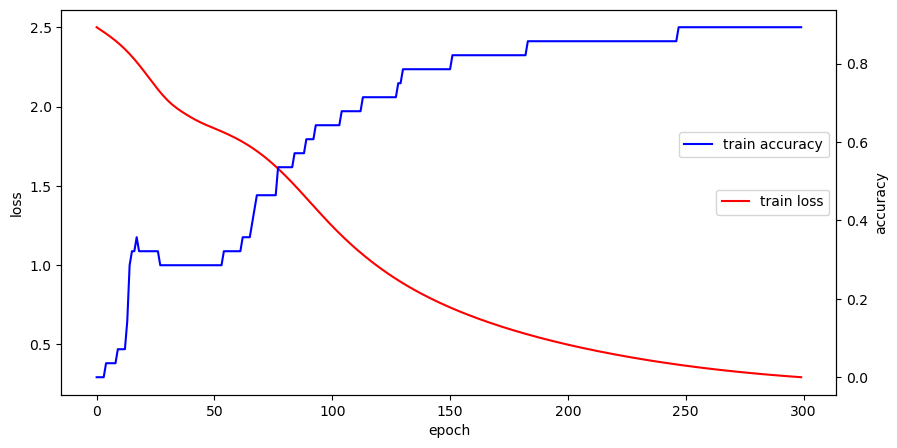

In [20]:
# 학습과정 표시하기(validation dataset 없는 경우)
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

# 4. 다음 문맥 예측하기

In [21]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [22]:
# 모델 사용하기 (문자 -> sequence로 수정 -> padding 처리 -> predict -> argmax() -> 문자)
# 경마장에 -> 있는
word = input('입력 단어 : ')
encoded = t.texts_to_sequences([word])[0]  # 1차원
# print('입력한 단어 : {}, encoded : {}'.format(word, encoded))
input_data = pad_sequences([encoded],          # 2차원 데이터
                           maxlen=X.shape[1],  # 독립변수 열수
                           padding='pre')
# print('입력한 단어 : {}, input_data : {}'.format(word, input_data))
pred = model.predict(input_data, verbose=0).argmax()
for word, value in t.word_index.items():
    if pred == value:
        print('예측된 단어 : ', word)
        break

입력 단어 : 경마장에
예측된 단어 :  있는


In [23]:
# 단어(가는), 5 => 가는 말이 고와야 오는 말이 곱다
def sentence_generation(model, t, current_word, n):
    for i in range(n):  # n번 반복
        # current_word(encoded) -> sequence -> padding -> predict.argmax => 결과 단어(result)
        # current_word = current_word+' '+result
        encoded = t.texts_to_sequences([current_word])[0]
        input_data = pad_sequences([encoded], maxlen=X.shape[1], padding='pre')
        pred = model.predict(input_data, verbose=0).argmax()  # 숫자
        for word, value in t.word_index.items():
            if pred == value:
                result = word
                # print('{} : {}'.format(i+1, result))
                current_word = current_word + ' ' + result
                # print('{} : {}'.format(i+1, current_word))
                break
    return current_word

In [24]:
# 문맥 예측해보기
sentence_generation(model, t, '경마장에', 4)

'경마장에 있는 말이 뛰고 있다'

In [29]:
# 단어(가는), 5 => 가는 말이 고와야 오는 말이 곱다
def sentence_generation(model, t, current_word, n):
    encoded = t.texts_to_sequences([current_word])[0]
    input_data = pad_sequences([encoded], 
                               maxlen=X.shape[1],
                               padding='pre')
    pred = model.predict(input_data, verbose=0).argmax()
    pred_word = ''
    for word, value in t.word_index.items():
        if pred==value:
            print(word, end = ' ')
            pred_word = word
            break
    if n != 0:
        sentence_generation(model, t, pred_word, n-1)

In [30]:
# 문맥 예측해보기
sentence_generation(model, t, '경마장에', 2)

있는 말이 뛰고 

In [31]:
# 단어(가는), 5 => 가는 말이 고와야 오는 말이 곱다
def sentence_generation(model, t, current_word, n):
    encoded = t.texts_to_sequences([current_word])[0]
    input_data = pad_sequences([encoded], 
                               maxlen=X.shape[1],
                               padding='pre')
    pred = model.predict(input_data, verbose=0).argmax()
    
    pred_word = ''
    for word, value in t.word_index.items():
        if pred==value:
            pred_word = current_word + ' ' + word
            break
            
    if n >= 1:
        return sentence_generation(model, t, pred_word, n-1)
    else:
        return (current_word)

In [32]:
# 문맥 예측해보기
sentence_generation(model, t, '경마장에', 2)

'경마장에 있는 말이'